### Dataset

In this homework, we will use the California Housing Prices from
[Kaggle](https://www.kaggle.com/datasets/camnugent/california-housing-prices).

Here’s a wget-able
[link](https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv):

``` bash
wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
```

In [1]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv

--2023-10-19 17:25:26--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1.4M) [text/plain]
Saving to: ‘housing.csv’

housing.csv         100%[===================>]   1.36M  --.-KB/s    in 0.07s   

2023-10-19 17:25:26 (20.5 MB/s) - ‘housing.csv’ saved [1423529/1423529]



### Preparing the dataset

For this homework, we only want to use a subset of data. This is the
same subset we used in homework #2.

First, keep only the records where `ocean_proximity` is either
`'<1H OCEAN'` or `'INLAND'`

Preparation:

-   Fill missing values with zeros.
-   Apply the log tranform to `median_house_value`.
-   Do train/validation/test split with 60%/20%/20% distribution.
-   Use the `train_test_split` function and set the `random_state`
    parameter to 1.
-   Use `DictVectorizer(sparse=True)` to turn the dataframe into
    matrices.

In [2]:
import pandas as pd
data = pd.read_csv('housing.csv')
data_subset = data[data.ocean_proximity.isin(['<1H OCEAN','INLAND'])]

In [3]:
data_subset.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [4]:
data_subset.total_bedrooms.fillna(0,inplace=True)

<ipython-input-4-927a96964ca3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset.total_bedrooms.fillna(0,inplace=True)


In [5]:
data_subset.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [6]:
import numpy as np
data_subset.median_house_value = np.log1p(data_subset.median_house_value)

<ipython-input-6-27783ec6d05f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset.median_house_value = np.log1p(data_subset.median_house_value)


In [7]:
y = data_subset[['median_house_value']]
data_subset.drop('median_house_value',axis=1,inplace=True)

<ipython-input-7-15486a26e66b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset.drop('median_house_value',axis=1,inplace=True)


In [8]:
from sklearn.model_selection import train_test_split
X_full_train, X_test, y_full_train, y_test = train_test_split(data_subset, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_full_train, y_full_train, test_size=0.2, random_state=1)

In [9]:
X_train.reset_index(drop=True,inplace=True)
X_val.reset_index(drop=True,inplace=True)
X_test.reset_index(drop=True,inplace=True)
y_train.reset_index(drop=True,inplace=True)
y_val.reset_index(drop=True,inplace=True)
y_test.reset_index(drop=True,inplace=True)

In [10]:
y_train = y_train.values.flatten()
y_val = y_val.values.flatten()
y_test = y_test.values.flatten()

In [11]:
from sklearn.feature_extraction import DictVectorizer
dicts = X_train[list(X_train.columns)].to_dict(orient='records')
dv = DictVectorizer(sparse=True)
X_train = dv.fit_transform(dicts)
dicts = X_val[list(X_val.columns)].to_dict(orient='records')
X_val = dv.transform(dicts)
dicts = X_test[list(X_test.columns)].to_dict(orient='records')
X_test = dv.transform(dicts)

## Question 1

Let’s train a decision tree regressor to predict the
`median_house_value` variable.

-   Train a model with `max_depth=1`.

Which feature is used for splitting the data?

-   `ocean_proximity`
-   `total_rooms`
-   `latitude`
-   `population`

In [12]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(max_depth=1)
dtr.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=1)

In [13]:
from sklearn.tree import export_text
tree_rules = export_text(dtr, feature_names=list(dv.feature_names_))

In [14]:
print(tree_rules)

|--- ocean_proximity=<1H OCEAN <= 0.50
|   |--- value: [11.61]
|--- ocean_proximity=<1H OCEAN >  0.50
|   |--- value: [12.30]



ocean_proximity is used for splitting the data

## Question 2

Train a random forest model with these parameters:

-   `n_estimators=10`
-   `random_state=1`
-   `n_jobs=-1` (optional - to make training faster)

What’s the RMSE of this model on validation?

-   0.045
-   0.245
-   0.545
-   0.845

In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
rfr = RandomForestRegressor(n_estimators=10,random_state=1,n_jobs=-1)
rfr.fit(X_train,y_train)
y_pred = rfr.predict(X_val)
mean_squared_error(y_val,y_pred,squared=False)

0.23949461966427005

RMSE of model on val set ~ 0.245

## Question 3

Now let’s experiment with the `n_estimators` parameter

-   Try different values of this parameter from 10 to 200 with step 10.
-   Set `random_state` to `1`.
-   Evaluate the model on the validation dataset.

After which value of `n_estimators` does RMSE stop improving?

-   10
-   25
-   50
-   160

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

  0%|          | 0/20 [00:00<?, ?it/s]

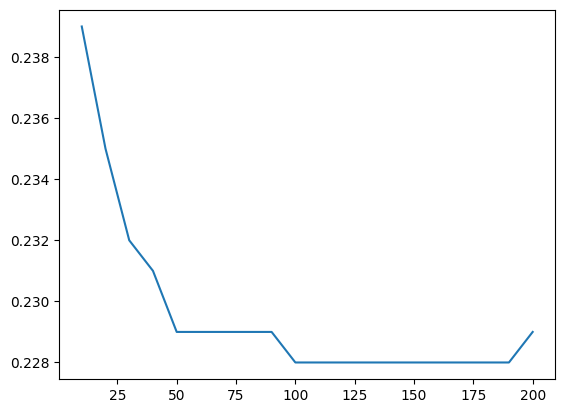

In [ ]:
from tqdm.auto import tqdm
pred_vals = []
for est in tqdm(range(10,201,10)):
  rfr = RandomForestRegressor(n_estimators=est,random_state=1,n_jobs=-1)
  rfr.fit(X_train,y_train)
  y_pred = rfr.predict(X_val)
  err = mean_squared_error(y_val,y_pred,squared=False)
  pred_vals.append((est,err))
df_scores = pd.DataFrame(pred_vals, columns=['n_estimators', 'rmse'])
plt.plot(df_scores.n_estimators, df_scores.rmse.round(3))
plt.show()

After n_estimators = 50 RMSE stop improving

## Question 4

Let’s select the best `max_depth`:

-   Try different values of `max_depth`: `[10, 15, 20, 25]`
-   For each of these values, try different values of `n_estimators`
    from 10 till 200 (with step 10)
-   Fix the random seed: `random_state=1`

What’s the best `max_depth`:

-   10
-   15
-   20
-   25

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

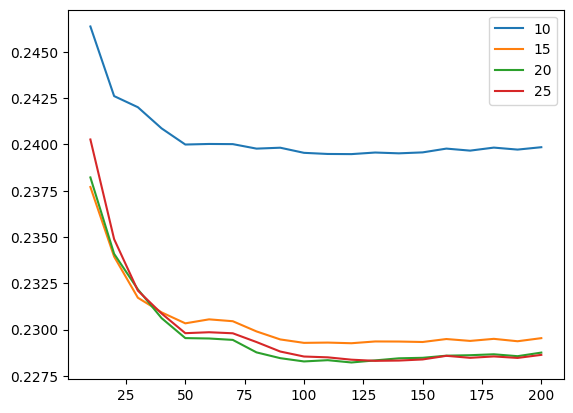

In [20]:
from tqdm.auto import tqdm
pred_vals = []
for max_depth in tqdm([10,15,20,25]):
  for est in tqdm(range(10,201,10)):
    rfr = RandomForestRegressor(n_estimators=est,random_state=1,n_jobs=-1,max_depth=max_depth)
    rfr.fit(X_train,y_train)
    y_pred = rfr.predict(X_val)
    err = mean_squared_error(y_val,y_pred,squared=False)
    pred_vals.append((max_depth,est,err))
  #min_error = min(pred_vals)
  #d[max_depth] = min_error
columns = ['max_depth', 'n_estimators', 'rmse']
df_scores = pd.DataFrame(pred_vals, columns=columns)
for d in [10, 15, 20, 25]:
    df_subset = df_scores[df_scores.max_depth == d]
    plt.plot(df_subset.n_estimators, df_subset.rmse, label=d)

plt.legend()
plt.show()

In [25]:
df_scores[(df_scores.max_depth.isin([20,25]))]

,max_depth,n_estimators,rmse
40,20,10,0.238219
41,20,20,0.234091
42,20,30,0.232172
43,20,40,0.230617
44,20,50,0.229538
45,20,60,0.229517
46,20,70,0.229441
47,20,80,0.228766
48,20,90,0.228454
49,20,100,0.228277


The best max_depth is 20 as RMSE is the lowest

# Question 5

We can extract feature importance information from tree-based models.

At each step of the decision tree learning algorith, it finds the best
split. When doint it, we can calculate “gain” - the reduction in
impurity before and after the split. This gain is quite useful in
understanding what are the imporatant features for tree-based models.

In Scikit-Learn, tree-based models contain this information in the
[`feature_importances_`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor.feature_importances_)
field.

For this homework question, we’ll find the most important feature:

-   Train the model with these parametes:
    -   `n_estimators=10`,
    -   `max_depth=20`,
    -   `random_state=1`,
    -   `n_jobs=-1` (optional)
-   Get the feature importance information from this model

What’s the most important feature?

-   `total_rooms`
-   `median_income`  
-   `total_bedrooms`
-   `longitude`

In [ ]:
rfr = RandomForestRegressor(n_estimators=10,
                            max_depth=20,
                            random_state=1,
                            n_jobs=-1)
rfr.fit(X_train,y_train)

RandomForestRegressor(max_depth=20, n_estimators=10, n_jobs=-1, random_state=1)

In [ ]:
feature_importances = pd.Series(rfr.feature_importances_, index=list(dv.feature_names_))

In [ ]:
feature_importances

households                   0.015380
housing_median_age           0.031975
latitude                     0.100697
longitude                    0.091017
median_income                0.334432
ocean_proximity=<1H OCEAN    0.328820
ocean_proximity=INLAND       0.036779
population                   0.026505
total_bedrooms               0.014869
total_rooms                  0.019526
dtype: float64

median_income is the most important feature

## Question 6

Now let’s train an XGBoost model! For this question, we’ll tune the
`eta` parameter:

-   Install XGBoost
-   Create DMatrix for train and validation
-   Create a watchlist
-   Train a model with these parameters for 100 rounds:

<!-- -->

    xgb_params = {
        'eta': 0.3,
        'max_depth': 6,
        'min_child_weight': 1,
        
        'objective': 'reg:squarederror',
        'nthread': 8,
        
        'seed': 1,
        'verbosity': 1,
    }

Now change `eta` from `0.3` to `0.1`.

Which eta leads to the best RMSE score on the validation dataset?

-   0.3
-   0.1
-   Both gives same

In [ ]:
!pip install xgboost

In [ ]:
import xgboost as xgb
import re
regex = re.compile(r"\[|\]|<", re.IGNORECASE)
features = list(dv.get_feature_names_out())
features = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in features]
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [ ]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [ ]:
xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'reg:squarederror',
    'nthread': 8,

    'seed': 1,
    'verbosity': 1,
}
model = xgb.train(xgb_params, dtrain, num_boost_round=100,
                  verbose_eval=5,
                  evals=watchlist)

[0]	train-rmse:0.44304	val-rmse:0.44359
[5]	train-rmse:0.25280	val-rmse:0.27018
[10]	train-rmse:0.21620	val-rmse:0.24424
[15]	train-rmse:0.20079	val-rmse:0.23683
[20]	train-rmse:0.18960	val-rmse:0.23513
[25]	train-rmse:0.17876	val-rmse:0.23051
[30]	train-rmse:0.17074	val-rmse:0.22973
[35]	train-rmse:0.16331	val-rmse:0.22722
[40]	train-rmse:0.15786	val-rmse:0.22694
[45]	train-rmse:0.15266	val-rmse:0.22590
[50]	train-rmse:0.14730	val-rmse:0.22380
[55]	train-rmse:0.14375	val-rmse:0.22307
[60]	train-rmse:0.13930	val-rmse:0.22250
[65]	train-rmse:0.13617	val-rmse:0.22282
[70]	train-rmse:0.13318	val-rmse:0.22223
[75]	train-rmse:0.12936	val-rmse:0.22156
[80]	train-rmse:0.12659	val-rmse:0.22148
[85]	train-rmse:0.12353	val-rmse:0.22143
[90]	train-rmse:0.11972	val-rmse:0.22091
[95]	train-rmse:0.11686	val-rmse:0.22080
[99]	train-rmse:0.11475	val-rmse:0.22072


In [ ]:
y_pred = model.predict(dval)
mean_squared_error(y_val,y_pred,squared=False)

0.2207210602201332

In [ ]:
xgb_params = {
    'eta': 0.1,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'reg:squarederror',
    'nthread': 8,

    'seed': 1,
    'verbosity': 1,
}
model = xgb.train(xgb_params, dtrain, num_boost_round=100,
                  verbose_eval=5,
                  evals=watchlist)

[0]	train-rmse:0.52380	val-rmse:0.52215
[5]	train-rmse:0.37851	val-rmse:0.38190
[10]	train-rmse:0.30462	val-rmse:0.31335
[15]	train-rmse:0.26784	val-rmse:0.28121
[20]	train-rmse:0.24801	val-rmse:0.26561
[25]	train-rmse:0.23358	val-rmse:0.25550
[30]	train-rmse:0.22225	val-rmse:0.24766
[35]	train-rmse:0.21413	val-rmse:0.24283
[40]	train-rmse:0.20733	val-rmse:0.23897
[45]	train-rmse:0.20220	val-rmse:0.23631
[50]	train-rmse:0.19700	val-rmse:0.23356
[55]	train-rmse:0.19285	val-rmse:0.23151
[60]	train-rmse:0.18887	val-rmse:0.22965
[65]	train-rmse:0.18555	val-rmse:0.22859
[70]	train-rmse:0.18233	val-rmse:0.22750
[75]	train-rmse:0.17902	val-rmse:0.22644
[80]	train-rmse:0.17604	val-rmse:0.22572
[85]	train-rmse:0.17288	val-rmse:0.22466
[90]	train-rmse:0.17040	val-rmse:0.22432
[95]	train-rmse:0.16792	val-rmse:0.22401
[99]	train-rmse:0.16604	val-rmse:0.22328


In [ ]:
y_pred = model.predict(dval)
mean_squared_error(y_val,y_pred,squared=False)

0.2232794233247614

Both eta lead to same RMSE score on the validation dataset